In [1]:
%matplotlib inline

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

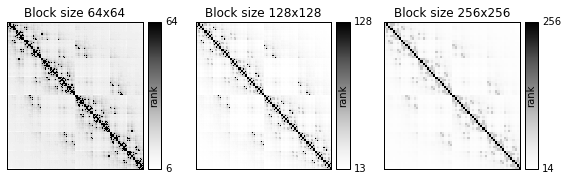

In [3]:
fig = plt.figure(figsize=(8,2.6))
files_to_draw = ["spatial_heatmap/heatmap_16384x64.dat",
                 "spatial_heatmap/heatmap_16384x128.dat",
                 "spatial_heatmap/heatmap_16384x256.dat",
                 #"spatial_heatmap/heatmap_16384x512.dat",
                ]
for ind in range(len(files_to_draw)):
    with open(files_to_draw[ind], "r") as fd:
        nrows, ncols = map(int, fd.readline().split())
        mat = np.ndarray((nrows, ncols), dtype=np.int)
        for i in range(nrows):
            line = fd.readline().split()
            for j in range(ncols):
                mat[i, j] = int(line[j])
        ax = plt.subplot(1, 3, ind+1)
        image = ax.imshow(mat, cmap=plt.cm.Greys, interpolation="nearest", aspect="auto")
        cbar = fig.colorbar(image, fraction=0.0888, pad=0.03, ticks=[mat.min(),mat.max()], aspect="auto")
        cbar.ax.text(.5, .5, "rank", ha='center', va='center', rotation=90)
        ax.set_title("Block size {}x{}".format(16384/nrows, 16384/nrows))
        #ax.set_xticks(np.arange(nrows/4, nrows, nrows/4))
        #ax.set_yticks(np.arange(nrows/4, nrows, nrows/4))
        ax.set_xticks([])
        ax.set_yticks([])
        #ax.grid()
plt.tight_layout()
plt.savefig("spatial_heatmap/heatmap_16384.pdf")
plt.show()

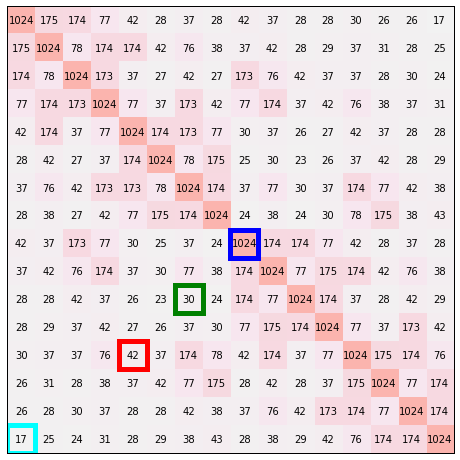

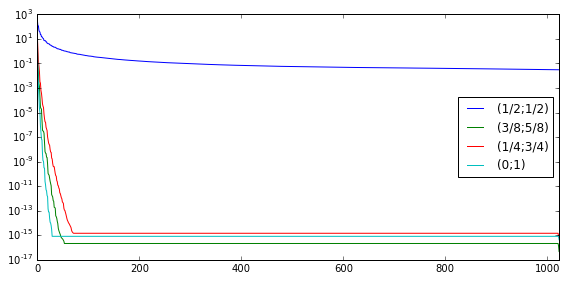

In [23]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(1, 1, 1)
with open("spatial_heatmap/heatmap_16384x1024.dat", "r") as fd:
    nrows, ncols = map(int, fd.readline().split())
    mat = np.ndarray((nrows, ncols), dtype=np.int)
    for i in range(nrows):
        line = fd.readline().split()
        for j in range(ncols):
            mat[i, j] = int(line[j])
    ax.imshow(mat, cmap=plt.cm.Pastel1_r, interpolation="nearest")
    ax.set_xticks([])
    ax.set_yticks([])
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            ax.text(j, i, "{}".format(mat[i, j]),
                     horizontalalignment='center', verticalalignment='center')
    # (8,8), (10,6), (12,4), (15,0)
    ax.add_patch(patches.Rectangle((7.5,7.5), 1, 1, fill=0, edgecolor="blue", linewidth=5))
    ax.add_patch(patches.Rectangle((5.5,9.5), 1, 1, fill=0, edgecolor="green", linewidth=5))
    ax.add_patch(patches.Rectangle((3.5,11.5), 1, 1, fill=0, edgecolor="red", linewidth=5))
    ax.add_patch(patches.Rectangle((-.5,14.5), 1, 1, fill=0, edgecolor="cyan", linewidth=5))
    plt.savefig("spatial_heatmap/heatmap_16384x1024.pdf")
    plt.show()
    plt.close()
    fig, ax = plt.subplots(figsize=(8,4))
    S1 = np.array(map(float, fd.readline().split()))
    S2 = np.array(map(float, fd.readline().split()))
    S3 = np.array(map(float, fd.readline().split()))
    S4 = np.array(map(float, fd.readline().split()))
    ax.semilogy(S1, label='(1/2;1/2)')
    ax.semilogy(S2, label='(3/8;5/8)')
    ax.semilogy(S3, label='(1/4;3/4)')
    ax.semilogy(S4, label='(0;1)')
    ax.set_xlim(0, S1.size-1)
    ax.legend(loc='best')
    plt.tight_layout()
    plt.savefig("spatial_heatmap/heatmap_16384x1024_decay.pdf")
    plt.show()